In [1]:
%load_ext lab_black

from puzzles import load_puzzle

s = load_puzzle(5)

In [2]:
with open("data/05.txt", "w") as f:
    f.write(s)

# First Part

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
field = np.zeros([1000, 1000], dtype=int)

for line in s.strip().split("\n"):
    c_from, c_to = line.split(" -> ")
    x0, y0 = c_from.split(",")
    x1, y1 = c_to.split(",")
    (x0, x1), (y0, y1) = sorted([int(x0), int(x1)]), sorted([int(y0), int(y1)])

    if x0 != x1 and y0 != y1:
        continue

    if x0 == x1:
        field[y0 : y1 + 1, x0] = field[y0 : y1 + 1, x0] + 1
    else:  # y0 == y1
        field[y0, x0 : x1 + 1] = field[y0, x0 : x1 + 1] + 1

In [66]:
(field >= 2).sum()

5169

<AxesSubplot:>

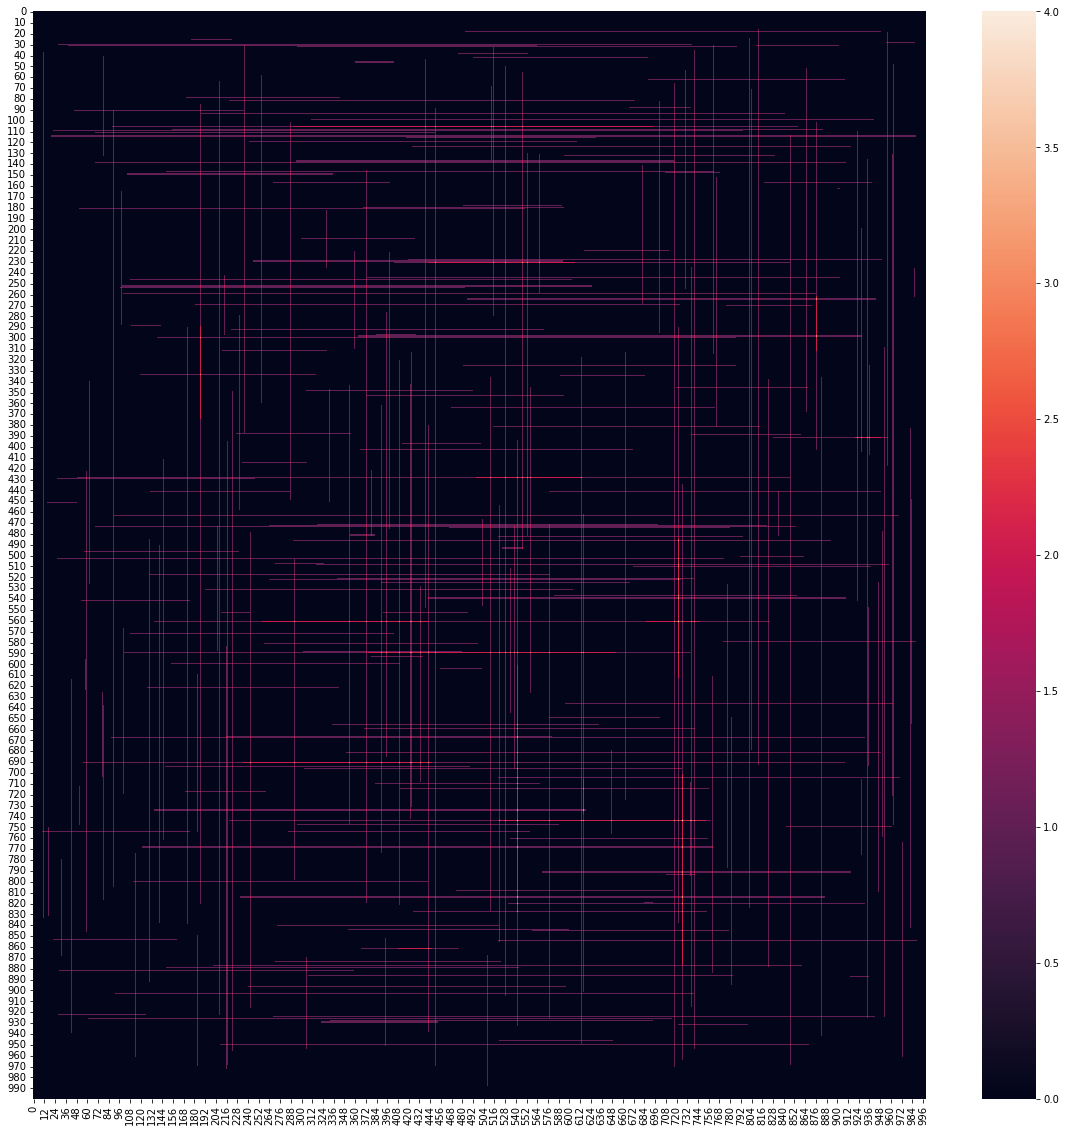

In [67]:
plt.figure(figsize=(20, 20))
sns.heatmap(field)

---

# Second Part

In [88]:
field = np.zeros([1000, 1000], dtype=int)

for line in s.strip().split("\n"):
    c_from, c_to = line.split(" -> ")
    x0, y0 = c_from.split(",")
    x1, y1 = c_to.split(",")

    if x0 == x1 or y0 == y1:
        (x0, x1), (y0, y1) = sorted([int(x0), int(x1)]), sorted([int(y0), int(y1)])
        if x0 == x1:
            field[y0 : y1 + 1, x0] = field[y0 : y1 + 1, x0] + 1
        else:  # y0 == y1:
            field[y0, x0 : x1 + 1] = field[y0, x0 : x1 + 1] + 1
    else:
        x0, x1, y0, y1 = int(x0), int(x1), int(y0), int(y1)
        for x, y in zip(
            range(x0, x1 + np.sign(x1 - x0), np.sign(x1 - x0)),
            range(y0, y1 + np.sign(y1 - y0), np.sign(y1 - y0)),
        ):
            field[y, x] = field[y, x] + 1

In [89]:
(field >= 2).sum()

22083

<AxesSubplot:>

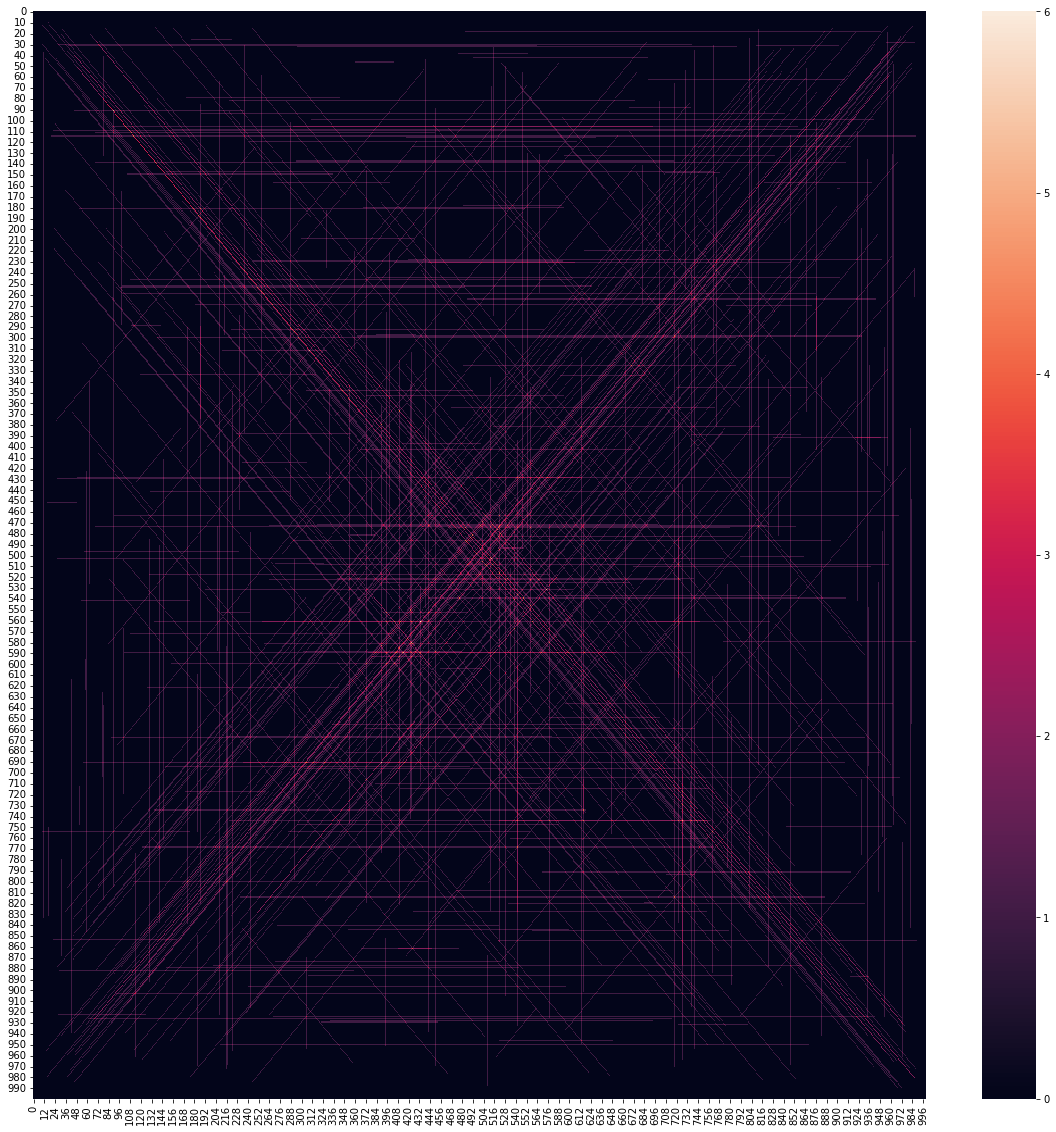

In [79]:
plt.figure(figsize=(20, 20))
sns.heatmap(field)